# <center>ENEM - pt. 2
<hr>

## <center>Inicialização
<hr>

In [1]:
from tcc_funcoes import *

=================================== Módulo importado com sucesso ===================================



In [2]:
dc_dfs = abre_arquivo_pickle('dc_dfs.pkl')
dc_preditoras = abre_arquivo_pickle('dc_preditoras.pkl')
dc_target = abre_arquivo_pickle('dc_target.pkl')
edicoes = abre_arquivo_pickle('edicoes.pkl')

## <center>Análise Exploratória - Notas
<hr>

Para iniciar a análise exploratória, vamos analisar as variáveis respostas, começando pela forma de preenchimento de cada, entendo quais são os valores distintos, a média, mediana, desvio padrão, valores mínimos e máximos.

In [3]:
### Notas distintas, delta entre notas e estatísticas descritivas

dc_describe = {}

for k, v in dc_dfs.items():

    v_notas = np.sort(v[dc_target[k]].unique())

    v_delta_notas = np.diff(v_notas)

    print("=" * 50)
    print()

    print(f"Notas distintas em {k}:")
    print()

    print(v_notas)
    print(len(v_notas))
    print()

    print(v_delta_notas)
    print()

    dc_describe[k] = v[dc_target[k]].astype('float32').describe()
    print()

df_describe_notas = pd.DataFrame(dc_describe).T

del k, v, v_notas, v_delta_notas, dc_describe
gc.collect()


Notas distintas em Ciências Humanas:

[  0.  289.9 293.2 ... 844.  846.9 862.6]
5235

[2.8989999e+02 3.3000183e+00 2.9998779e-01 ... 9.9975586e-02 2.9000244e+00
 1.5699951e+01]



Notas distintas em Ciências Natureza:

[  0.  307.7 308.3 ... 868.4 868.7 875.3]
5238

[3.0770001e+02 5.9997559e-01 2.0001221e-01 ... 1.3000488e+00 2.9998779e-01
 6.5999756e+00]



Notas distintas em Linguagem e Código:

[  0.  270.6 270.8 ... 820.8 821.6 826.1]
5073

[2.7060001e+02 1.9998169e-01 1.0000610e-01 ... 2.9998779e-01 7.9998779e-01
 4.5000000e+00]



Notas distintas em Matemática:

[  0.  310.4 310.5 ... 983.2 983.9 985.7]
6621

[3.1039999e+02 1.0000610e-01 3.9999390e-01 ... 1.5000000e+00 7.0001221e-01
 1.7999878e+00]



Notas distintas em Redação:

[   0.   40.   60.   80.  100.  120.  140.  160.  180.  200.  220.  240.
  260.  280.  300.  320.  340.  360.  380.  400.  420.  440.  460.  480.
  500.  520.  540.  560.  580.  600.  620.  640.  660.  680.  700.  720.
  740.  760.  780.  800.  820.  84

0

In [4]:
df_describe_notas.T

,Ciências Humanas,Ciências Natureza,Linguagem e Código,Matemática,Redação
count,7.895093e+06,7.500050e+06,7.895093e+06,7.500050e+06,7.895093e+06
mean,5.238126e+02,4.968878e+02,5.190258e+02,5.386558e+02,6.166102e+02
std,9.131224e+01,8.146093e+01,7.693933e+01,1.214854e+02,2.046583e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.601000e+02,4.373000e+02,4.701000e+02,4.416000e+02,5.200000e+02
50%,5.286000e+02,4.903000e+02,5.252000e+02,5.260000e+02,6.200000e+02
75%,5.882000e+02,5.519000e+02,5.736000e+02,6.249000e+02,7.600000e+02
max,8.626000e+02,8.753000e+02,8.261000e+02,9.857000e+02,1.000000e+03


In [5]:
del df_describe_notas
gc.collect()

0

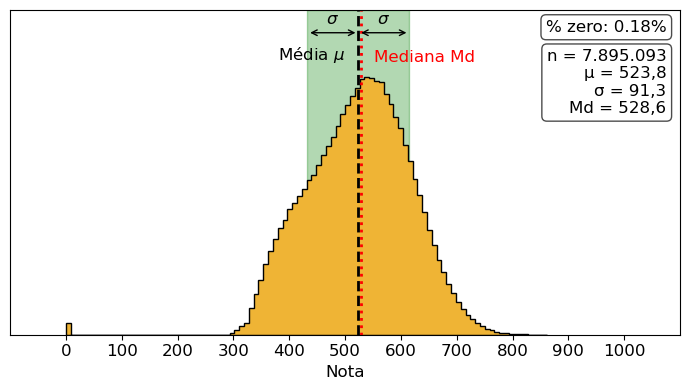

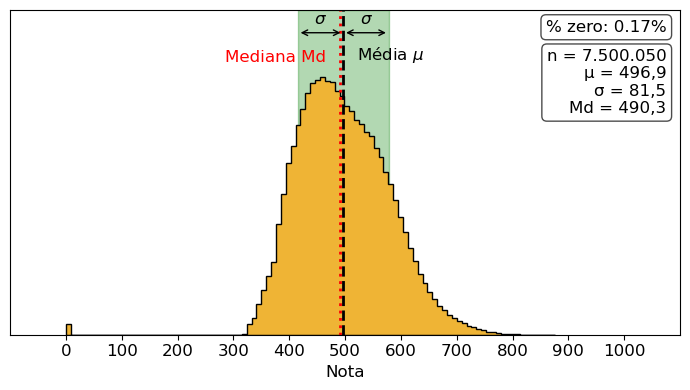

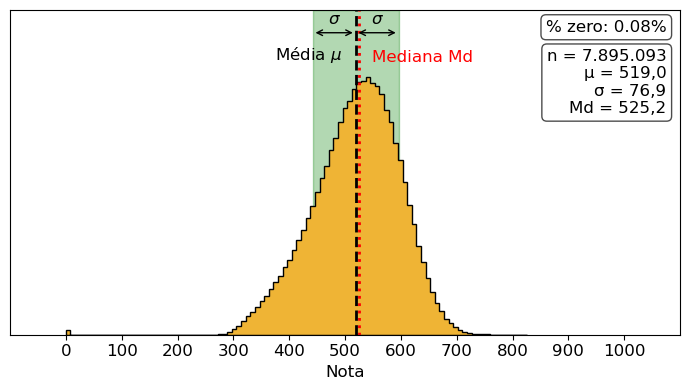

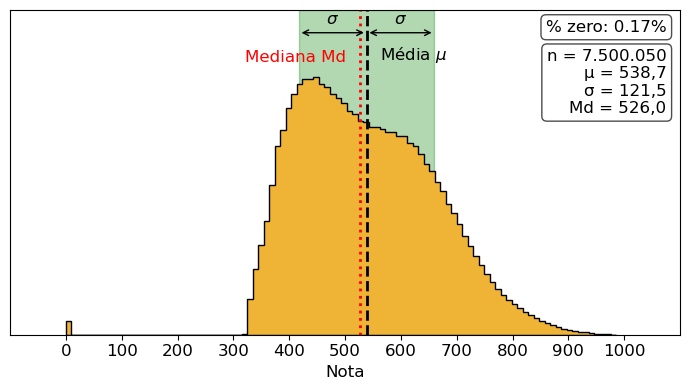

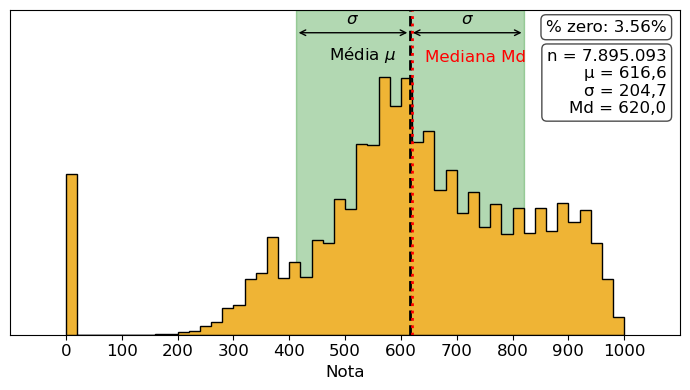

16762

In [6]:
### Distribuição das notas

dc_nome_salvar = {
    'Ciências Humanas' : 'humanas',
    'Ciências Natureza' : 'natureza',
    'Linguagem e Código' : 'linguagem_codigo',
    'Matemática' : 'matematica',
    'Redação' : 'redacao'
}

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    if nome == 'Redação':
        bins = 50
    else:
        bins = 100

    data = df[target].astype('float32')

    media = data.mean()
    mediana = data.median()
    desv_pad = data.std()
    
    n_str = f"{len(data):,}".replace(",", ".")
    mean_str = f"{media:.1f}".replace(".", ",")
    std_str = f"{desv_pad:.1f}".replace(".", ",")
    med_str = f"{mediana:.1f}".replace(".", ",")

    plt.figure(figsize = (7, 4))

    # plt.title(f"Histograma das notas - {nome}", fontsize = 16)

    plt.xlabel("Nota", fontsize = 12)
    plt.ylabel("")

    plt.xticks(range(0, 1001, 100), fontsize = 12)
    plt.yticks([])

    # área verde do desvio padrão
    plt.axvspan(
        media - desv_pad,
        media + desv_pad,
        color = 'green',
        alpha = 0.3
    )

    # histograma
    plt.hist(
        data,
        bins = bins,
        color = 'xkcd:macaroni and cheese',
        alpha = 1,
        edgecolor = 'black',
        histtype = 'stepfilled'
    )

    # linha da média
    plt.axvline(
        x = media,
        color = 'black',
        linestyle = 'dashed',
        linewidth = 2,
        label = f"Média: {media:.2f}"
    )

    # linha da mediana
    plt.axvline(
        x = mediana,
        color = 'red',
        linestyle = 'dotted',
        linewidth = 2,
        label = f"Mediana: {mediana:.2f}"
    )

    plt.xlim(-100, 1100)
    plt.ylim(0, max(plt.gca().get_ylim()) * 1.2)

    # legenda feita de forma manual
    plt.text(
        0.98, 0.88,
        f"n = {n_str}\nμ = {mean_str}\nσ = {std_str}\nMd = {med_str}",
        transform=plt.gca().transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
        fontsize=12
    )

    # seta direita do desvio padrão
    y_seta = plt.gca().get_ylim()[1] * 0.93

    plt.annotate(
        "",
        xy = (media + desv_pad, y_seta),
        xytext = (media, y_seta),
        arrowprops = dict(arrowstyle="<->", color="black", linewidth=1)
    )

    plt.text(
        media + desv_pad / 2,
        y_seta * 1.02,
        r"$\sigma$",
        ha="center",
        va="bottom",
        fontsize=12,
        color="black"
    )

    # seta esquerda do desvio padrão
    plt.annotate(
        "",
        xy = (media - desv_pad, y_seta),
        xytext = (media, y_seta),
        arrowprops = dict(arrowstyle="<->", color="black", linewidth=1)
    )

    plt.text(
        media - desv_pad / 2,
        y_seta * 1.02,
        r"$\sigma$",
        ha="center",
        va="bottom",
        fontsize=12,
        color="black"
    )

    # Anotações relativas à posição da média e mediana
    x_span = plt.gca().get_xlim()[1] - plt.gca().get_xlim()[0]
    offset = x_span * 0.02

    y_pos = plt.gca().get_ylim()[1] * 0.83

    if mediana > media:
        # mediana à direita, média à esquerda
        plt.gca().text(mediana + offset, y_pos, "Mediana Md", ha='left', va='bottom', fontsize=12, color='red')
        plt.gca().text(media - offset, y_pos, r"Média $\mu$", ha='right', va='bottom', fontsize=12, color='black')
    elif media > mediana:
        # mediana à esquerda, média à direita
        plt.gca().text(mediana - offset, y_pos, "Mediana Md", ha='right', va='bottom', fontsize=12, color='red')
        plt.gca().text(media + offset, y_pos, r"Média $\mu$", ha='left', va='bottom', fontsize=12, color='black')

    # anotação do percentual de zeros

    perc_zeros = (data == 0).sum() / len(data) * 100

    plt.text(
        0.98, 0.97,
        f"% zero: {perc_zeros:.2f}%",
        transform=plt.gca().transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
        fontsize=12
    )

    plt.tight_layout()
    plt.savefig(f"../texto/imagens/histograma_{dc_nome_salvar[nome]}.png", dpi=300, bbox_inches='tight')
    plt.show()

del nome, df, bins, target, media, mediana, desv_pad
del y_seta, x_span, offset, y_pos, data, mean_str
del std_str, med_str, n_str, perc_zeros
gc.collect()


In [7]:
### Assimetria e Curtose

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    skewness = df[target].astype('float32').skew()
    kurtosis = df[target].astype('float32').kurtosis()

    print(f"{nome} - Assimetria: {skewness:.4f} | Curtose: {kurtosis:.4f}")

print()

del nome, df, target, skewness, kurtosis
gc.collect()

Ciências Humanas - Assimetria: -0.3408 | Curtose: 1.1269
Ciências Natureza - Assimetria: 0.0321 | Curtose: 1.8372
Linguagem e Código - Assimetria: -0.5113 | Curtose: 1.1780
Matemática - Assimetria: 0.3138 | Curtose: 0.0850
Redação - Assimetria: -0.7457 | Curtose: 1.0488



0

In [8]:
### Teste de hipótese de que as médias das notas são iguais entre as edições

from scipy.stats import f_oneway

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    grupos = [df.loc[df['edicao'] == e, target].values.astype('float32') for e in edicoes]

    medias_por_ano = [np.mean(g) for g in grupos]
    diff_maxima = max(medias_por_ano) - min(medias_por_ano)

    # Estatística F
    stat, p_value = f_oneway(*grupos)
    alpha = 0.001

    # Tamanho do Efeito - Standardized mean difference
    desvio_padrao = df[target].astype('float32').std()
    smd = diff_maxima / desvio_padrao

    # Conclusão do teste de hipótese
    if p_value < alpha:
        rejeita_h0 = 'Sim'
    else:
        rejeita_h0 = 'Não'

    # Interpretação do tamanho do efeito
    if smd < 0.2:
        interpretacao = "Insignificante"
    elif smd < 0.5:
        interpretacao = "Pequeno"
    elif smd < 0.8:
        interpretacao = "Médio"
    else:
        interpretacao = "Grande"

    print(f"{nome} | Estatística F: {stat:.4f} | Rejeita-se H0: {rejeita_h0} | p-valor: {p_value:.4e} | SMD: {smd:.4f} | {interpretacao}")

del nome, df, target, grupos, stat, p_value, alpha, medias_por_ano, diff_maxima
del desvio_padrao, smd, interpretacao
gc.collect()

Ciências Humanas | Estatística F: 13161.5488 | Rejeita-se H0: Sim | p-valor: 0.0000e+00 | SMD: 0.1850 | Insignificante
Ciências Natureza | Estatística F: 3431.3132 | Rejeita-se H0: Sim | p-valor: 0.0000e+00 | SMD: 0.0866 | Insignificante
Linguagem e Código | Estatística F: 26507.5898 | Rejeita-se H0: Sim | p-valor: 0.0000e+00 | SMD: 0.2686 | Pequeno
Matemática | Estatística F: 13041.6191 | Rejeita-se H0: Sim | p-valor: 0.0000e+00 | SMD: 0.1968 | Insignificante
Redação | Estatística F: 27498.2207 | Rejeita-se H0: Sim | p-valor: 0.0000e+00 | SMD: 0.2422 | Pequeno


0

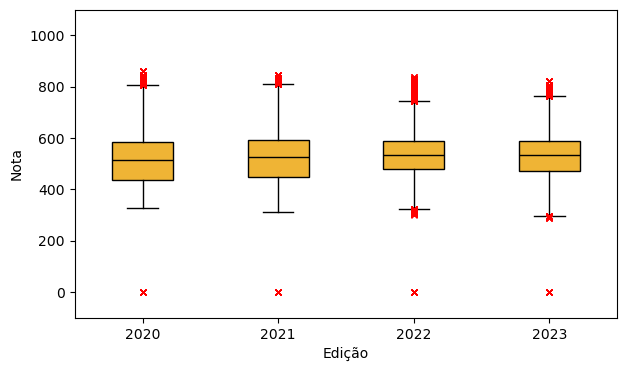

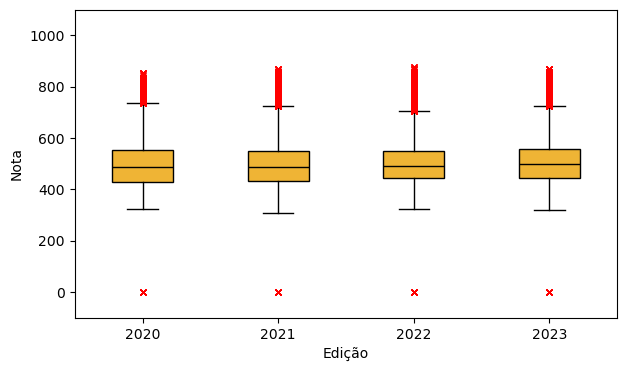

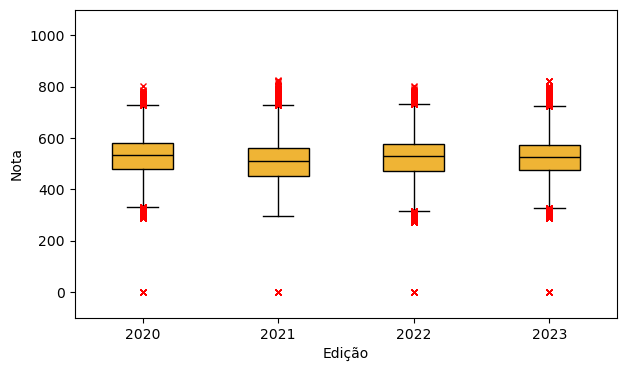

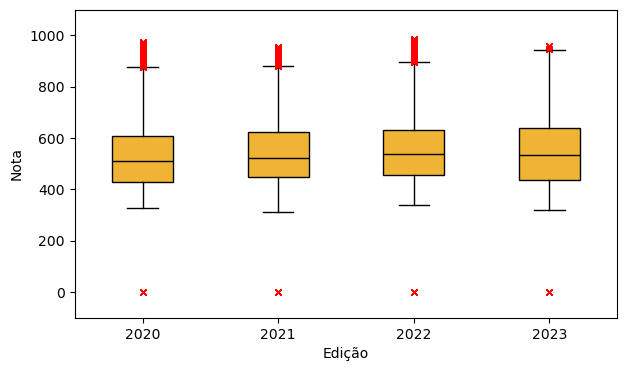

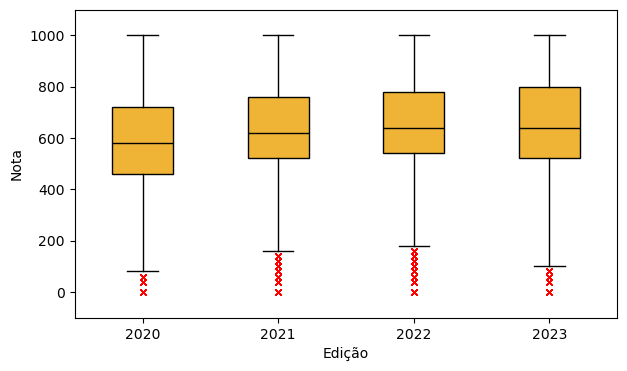

12270

In [9]:
### Boxplot

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    plt.figure(figsize = (7, 4))

    # agrupar por edição e criar boxplot por edição
    data = [df.loc[df['edicao'] == e, target].values.astype('float32') for e in edicoes]

    plt.boxplot(
        data,
        vert = True,
        patch_artist = True,
        tick_labels = edicoes,
        boxprops = dict(facecolor = 'xkcd:macaroni and cheese', color = 'black'),
        medianprops = dict(color = 'black'),
        whiskerprops = dict(color = 'black'),
        capprops = dict(color = 'black'),
        flierprops = dict(markerfacecolor = 'red', markeredgecolor = 'red', markersize = 5, marker = 'x')
    )

    plt.ylim(-100,1100)
    plt.yticks(range(0, 1001, 200))

    plt.xlabel("Edição")
    plt.ylabel("Nota")
    # plt.title(f"Boxplot das notas por edição - {nome}")
    plt.savefig(f"../texto/imagens/boxplot_{dc_nome_salvar[nome]}.png", dpi=300, bbox_inches='tight')
    plt.show()

del nome, df, target, data
gc.collect()

Uma vez que as notas não são diferentes de forma significativa entre as edições, iremos retirar a variável 'edicao' da lista de variáveis preditoras.

In [10]:
for k, v in dc_preditoras.items():

    dc_preditoras[k].remove('edicao')

In [11]:
### Percentual de outliers

dc_limites_outliers = {}

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    total = len(df)

    quartil_1 = df[target].quantile(0.25)
    quartil_3 = df[target].quantile(0.75)
    i_q_r = quartil_3 - quartil_1

    limite_inferior = max(quartil_1 - 1.5 * i_q_r, 0)
    limite_superior = min(quartil_3 + 1.5 * i_q_r, 1000)

    dc_limites_outliers[nome] = (limite_inferior, limite_superior)

    outliers_abaixo = df[(df[target] < limite_inferior)]
    outliers_acima = df[(df[target] > limite_superior)]

    print("=" * 50)
    print()

    print(f"Outliers - {nome}")
    print()

    print(f"Limite Superior: {limite_superior:.2f}")
    print(f"Limite Inferior: {limite_inferior:.2f}")
    print()

    print(f"Superiores: {len(outliers_acima):,} ({len(outliers_acima) / total:.2%})")
    print(f"Inferiores: {len(outliers_abaixo):,} ({len(outliers_abaixo) / total:.2%})")
    print(f"Total: {len(outliers_acima) + len(outliers_abaixo):,} ({(len(outliers_acima) + len(outliers_abaixo)) / total:.2%})")
    print()

print("=" * 50)

del target, total, quartil_1, quartil_3, i_q_r
del limite_inferior, limite_superior, outliers_abaixo, outliers_acima, nome, df
gc.collect()


Outliers - Ciências Humanas

Limite Superior: 780.35
Limite Inferior: 267.95

Superiores: 5,627 (0.07%)
Inferiores: 13,969 (0.18%)
Total: 19,596 (0.25%)


Outliers - Ciências Natureza

Limite Superior: 723.80
Limite Inferior: 265.40

Superiores: 36,402 (0.49%)
Inferiores: 12,615 (0.17%)
Total: 49,017 (0.65%)


Outliers - Linguagem e Código

Limite Superior: 728.85
Limite Inferior: 314.85

Superiores: 3,195 (0.04%)
Inferiores: 32,803 (0.42%)
Total: 35,998 (0.46%)


Outliers - Matemática

Limite Superior: 899.85
Limite Inferior: 166.65

Superiores: 15,096 (0.20%)
Inferiores: 12,848 (0.17%)
Total: 27,944 (0.37%)


Outliers - Redação

Limite Superior: 1000.00
Limite Inferior: 160.00

Superiores: 0 (0.00%)
Inferiores: 282,438 (3.58%)
Total: 282,438 (3.58%)



0

Na análise de outliers, usando o critério de 1.5 vezes o intervalo interquartil, na nora da redação as notas 1000 foram consideradas como não-outliers. Porém, analisando a distribuição das notas e conhecendo o contexto do ENEM, sabemos que as notas máximas, por mais que sejam válidas, são incomuns e podem ser consideradas outliers para o nosso problema.

In [12]:
### Ajuste limite superior da Redação

dc_limites_outliers['Redação'] = (dc_limites_outliers['Redação'][0], 980)

### Retirando os outliers

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    limite_inferior, limite_superior = dc_limites_outliers[nome]

    antes = df.shape[0]

    dc_dfs[nome] = df[(df[target] >= limite_inferior) & (df[target] <= limite_superior)].copy()

    depois = dc_dfs[nome].shape[0]

    print(f"{nome}: {antes - depois:,} linhas removidas como outliers ({(antes - depois) / antes:.2%})")

del nome, df, target, limite_inferior, limite_superior, antes, depois, dc_limites_outliers
gc.collect()

Ciências Humanas: 19,596 linhas removidas como outliers (0.25%)
Ciências Natureza: 49,017 linhas removidas como outliers (0.65%)
Linguagem e Código: 35,998 linhas removidas como outliers (0.46%)
Matemática: 27,944 linhas removidas como outliers (0.37%)
Redação: 282,554 linhas removidas como outliers (3.58%)


0

## $$\texttt{pickle}$$
<hr>

In [ ]:
salva_arquivo_pickle(
    'dados/pickle/dc_dfs_sem_outliers.pkl',
    dc_dfs
)

salva_arquivo_pickle(
    'dados/pickle/dc_nome_salvar.pkl',
    dc_nome_salvar
)

salva_arquivo_pickle(
    'dados/pickle/dc_preditoras.pkl',
    dc_preditoras
)

In [ ]:
exit()

: 